In [ ]:
import sys
import pandas as pd
import numpy as np
import setuptools
import conda
!pip install datascience
from datascience import *
!pip install matplotlib
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# SSC/IA LOE's by proportion of case work

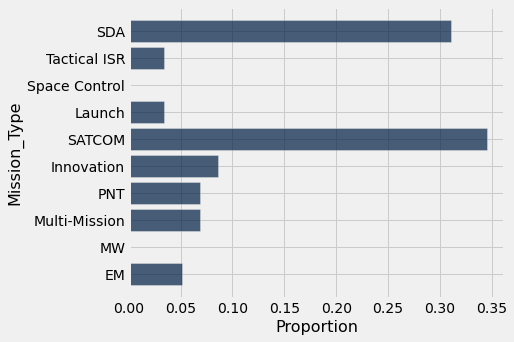

In [2]:
#What are the proportions of SSC/IA or CPO mission types?
values_1 = make_array("SDA", "Tactical ISR", "Space Control", "Launch", "SATCOM", "Innovation", "PNT", "Multi-Mission", "MW", "EM")
values_2 = make_array(18, 2, 0, 2, 20, 5, 4, 4, 0, 3)

mission_props = Table().with_columns("Mission_Type", values_1, "Proportion", values_2/sum(values_2))
mission_props
mission_props.barh("Mission_Type")

# Data on fiscal imports/export of foreign countries w.r.t the U.S.

In [3]:
trade_data_table = Table().read_table("country (1).csv")
trade_data_table

year,CTY_CODE,CTYNAME,IJAN,IFEB,IMAR,IAPR,IMAY,IJUN,IJUL,IAUG,ISEP,IOCT,INOV,IDEC,IYR,EJAN,EFEB,EMAR,EAPR,EMAY,EJUN,EJUL,EAUG,ESEP,EOCT,ENOV,EDEC,EYR
1997,3,European Union,11644.9,11764.7,13616.9,13577.4,13528.9,13183.1,14865.8,12521.8,12894.2,15134,13311.3,14853,160896,10608.3,12064.8,13551.2,12450.5,12270.2,11868.4,10657.2,11042,11833.8,12773.9,11994.2,12816.9,143931
1998,3,European Union,12883.4,12954.5,15970.6,15144,14374.4,15502.9,16224.6,14233.6,14563.5,16813.6,15689,16195.7,180550,12269.4,12840.7,14479.3,12271.3,12951,12666.8,11275.9,12022.3,12656.2,13194.3,12476.9,12862.9,151967
1999,3,European Union,13700.7,14788.6,17131.3,16129.8,16035.2,17217.8,17873.4,16577,16117.9,18074.2,18522.2,17884.8,200053,12507.6,12899.7,14465.6,13091.2,12931.7,12393.7,11484.5,12219.1,12426.3,13680.9,13081.9,13642.6,154825
2000,3,European Union,15771.3,17227.4,20757.7,18285.4,19341.8,18583.1,18982.7,18894.4,18550.5,20953.3,20532.8,19020.4,226901,12235.6,13586.1,14729.9,13860.9,14224.1,14220.4,12235.6,13858.3,14482,14559.1,14604.6,15584.5,168181
2001,3,European Union,19413.6,18491.1,20720.2,19677.4,19596.3,18334.9,20129,18010.5,15676.7,20810.4,18664.4,17043.7,226568,13908.7,14794,15690,13949,14427.2,13996.9,11531.9,12844.9,12250.4,13317.2,12399.8,12821,161931
2002,3,European Union,16444.7,17043.8,19295.3,19730.8,19423.5,18696.7,21471.8,18790.5,18190,21443,20511.7,21271.6,232313,11619.6,12381.6,13604.1,12360.7,12215.8,12146.4,10748.3,11975.6,11790.4,13258.2,12703,11817.5,146621
2003,3,European Union,18656,18766.7,22053.6,21144.4,20815.2,21285.9,22315.9,19278.8,20451.9,23100.2,21602.3,23570.8,253042,12073.1,12338.4,14267.9,13214.8,12961.3,12935.7,11834.3,12200.9,12394.1,13911.5,13975.7,13062.4,155170
2004,3,European Union,19117.1,21879.6,25653.9,24408.4,23337.9,24142.1,23572,22823.2,21878,24537.2,25162,25447.2,281959,12703.9,13917.5,16052.7,14743.8,14825.5,13827.1,12988.8,13467,14077.2,15171.8,14301.2,15153.1,171230
2005,3,European Union,21997.6,23647.1,26257.6,25706.3,26691.3,26425.8,26425.8,25534.3,24951.4,27799.9,27795.4,26395.5,309628,13982.1,14893,16834.2,16300.5,16037,15586.7,14272.8,14459.9,14684.2,15838.5,15978.8,16298.2,185166
2006,3,European Union,24878.4,24114,29297.6,27054.7,29601.5,28397.9,28875.3,28457.7,25538.9,28222.8,28399.5,27643.4,330482,15035.4,15966.5,18824.7,17374,18145.3,19028.5,15865.6,17415.4,18274.1,18763.9,18577.1,18616.4,211887


# Data Manipulation and Cleaning

In [4]:
by_region = trade_data_table.where("year", are.equal_to(2021)).drop("year")
by_region

CTY_CODE,CTYNAME,IJAN,IFEB,IMAR,IAPR,IMAY,IJUN,IJUL,IAUG,ISEP,IOCT,INOV,IDEC,IYR,EJAN,EFEB,EMAR,EAPR,EMAY,EJUN,EJUL,EAUG,ESEP,EOCT,ENOV,EDEC,EYR
3,European Union,35743.2,35763.2,40484.6,40448.2,39923.5,43065.1,42210.6,42263.4,41114,42547.8,44365.7,42514.5,490444,19419.5,20107.4,22326.1,22358.4,22418.1,23180.4,21465,22709,23215,26042.6,23882.6,24576,271700
4,"World, Seasonally Adjusted",220255,217978,233032,229739,231615,236299,233984,236211,238961,242159,252826,258051,2.83111e+06,134910,130792,143561,143413,144803,145670,147264,148850,143884,156885,155658,158610,1.7543e+06
7,Advanced Technology Products,41160.2,35809.8,44311,43164.7,43024.1,46721.9,44832.3,45547.4,50484.6,51452.5,52500.1,54230.5,553239,26042.1,23037.9,29553,28273.4,27989.5,31857.1,30616.7,29550.9,30828.7,34210.7,30838,34495.5,357293
9,South and Central America,7426.61,8140.51,9938.17,9886.15,9709.81,10194.9,10454,10650.5,11357.4,11177.8,10850.6,11239.3,121026,12083.7,11270.4,13678.7,13011.9,14273.7,14521.7,15172.1,16013.1,14996.6,17087.2,15947.3,16786.3,174843
10,North America,53889.5,52569.4,63289.1,59656.2,60416,65191.8,61737.4,63042.3,61980.8,65929,68433.9,66301.1,742436,40985.5,43572.9,51513.1,47548.7,48416.8,50829.9,49350.1,49887.6,47453.6,51644.2,51602.3,51444.4,584249
12,Europe,48517.6,48153.1,56825.1,54209,54805.2,60220.8,57313.9,57284.8,55930.1,56485.6,61718.7,57844.9,669309,27413.4,28109.1,32822.9,32367.3,32249.6,32024.5,30042.2,33184.1,32519.5,36701.3,33353.8,35177.9,385965
13,Africa,2214.1,2356.8,3160.27,3254.2,3581.43,3174.69,3378.04,3372.25,2955.96,3433.95,3605.45,3121.95,37609.1,1895.25,1953.77,2435.32,2036.64,2271.56,2005.73,2061.55,2030.6,2041.6,2519.86,2775.35,2704.54,26731.7
14,Pacific Rim,71625.2,63181.7,79001.2,76272.5,77061.7,79130.3,79493.1,83584.7,86887.2,86729.1,86836.3,90431.6,960235,36258,29931.2,40795,38986.2,38402.4,37996,37319.3,36619.5,35402.3,44215,41649.9,40777.1,458352
15,"World, Not Seasonally Adjusted",204945,193568,237001,226718,230556,242477,237361,245277,244558,251324,259441,257886,2.83111e+06,127851,123861,152434,143701,145477,147741,143771,147906,142079,163682,156286,159510,1.7543e+06
16,Asia,91575.2,80981.9,102438,98311.7,100740,102100,102961,109230,110829,112604,113246,117767,1.24278e+06,43471.7,36946.2,49021.1,46135.7,45374.8,45752.1,44463.5,44062.1,42566.8,52807.1,50053,50840.5,551495


In [5]:
partner_list = make_array("Australia", "Belgium", "Canada", "Denmark", "France", "Germany", "India", "Israel", "Italy", "Japan", "Luxembourg", "Netherlands", "New Zealand", "Norway", "Poland", "Romania", "Korea, South", "Spain", "Thailand", "United Kingdom")
by_partner_region = by_region.where("CTYNAME", are.contained_in(partner_list))
by_partner_region.show()

CTY_CODE,CTYNAME,IJAN,IFEB,IMAR,IAPR,IMAY,IJUN,IJUL,IAUG,ISEP,IOCT,INOV,IDEC,IYR,EJAN,EFEB,EMAR,EAPR,EMAY,EJUN,EJUL,EAUG,ESEP,EOCT,ENOV,EDEC,EYR
1220,Canada,24742.7,25232.7,29838.3,27503.6,29062,32180.9,29833.7,30967.2,29943.5,31604.6,33828.8,33049.4,357788,21460,22218.1,28077.4,25177.3,25455.9,26709,25738.5,25766.6,24663.5,27292.8,27598.7,27600.4,307758
4039,Norway,326.249,578.242,630.444,554.608,603.569,582.234,661.985,516.169,569.343,542.36,519.023,647.832,6732.06,357.168,182.113,274.657,266.288,484.449,265.508,257.122,428.161,319.589,366.118,334.972,420.161,3956.31
4099,Denmark,1015.83,870.364,987.646,856.961,914.99,1255.18,1089.96,1232.17,641.934,867.388,1355.18,1020.84,12108.4,276.516,268.464,282.367,307.459,196.188,248.567,360.381,258.811,257.774,425.338,422.804,239.15,3543.82
4120,United Kingdom,3919.05,3852.02,5081.87,4615.2,4687.27,5169.79,4707.96,4702.54,4786.26,4624.03,4918.99,5299.25,56364.2,4664.34,4578.62,5388.59,5067.78,5579.99,5164.47,4929.55,5257.96,4857.93,5407.88,5278.91,5249.12,61425.1
4210,Netherlands,1793.5,2005.26,2492.7,3073.37,2734.27,2945.56,3363.02,3243.98,3848.18,2972.81,3262.12,3370.66,35105.4,3573.52,4126.49,4467.51,4621.65,4189.6,4415.25,4388.85,4271.59,4226.22,4881.67,4763.96,5153.8,53080.1
4231,Belgium,1709.96,1832.04,1845.15,1791.83,1602.99,1951.57,1814.84,1546.93,1646.13,1968.81,1763.94,1521.87,20996.1,2463.84,2807.16,2538.74,2547.96,3179.47,2838.83,2505.57,2873.08,3384.22,2993.22,2810.07,2778.8,33721
4239,Luxembourg,30.3112,43.9602,46.4651,49.0806,44.5499,54.8557,55.2584,49.3082,51.8817,40.2761,82.0356,44.6012,592.584,106.298,52.1993,102.013,104.373,137.418,105.402,177.469,155.387,132.343,218.355,123.212,117.013,1531.48
4279,France,3732.87,4325.54,4104.04,4481.37,3897.84,4371.51,4428.28,3825.62,4206.41,4468.37,4178.13,4083.81,50103.8,1919.52,2013.76,2474.54,2426.24,2466.94,2505.59,2191.62,2524.97,2632.11,3053.32,2572.23,3112.44,29893.3
4280,Germany,10854.2,9258.51,11495.6,11103.6,11204.2,11566.5,11340.7,12220.6,11024.4,11712.6,11788.4,11646.2,135216,4574.8,5010.92,5714.36,5574.01,5378.18,5887.96,5176.81,5619.64,5440.55,6132,5316.39,5506.89,65332.5
4550,Poland,628.686,648.716,823.895,752.136,801.914,842.015,1087.07,826.883,778.384,818.369,893.752,838.764,9740.59,402.98,429.918,479.19,450.18,532.646,502.901,489.097,440.604,406.681,547.582,606.402,554.952,5843.13


In [6]:
Percent_of_GDP_data = make_array(1.39, 1.4, 1.5, 2.2, 1.4, 1.07, 0.57, 1.9, 1.3, 2.2, 1.8, 1.5, 2, 5.2, 2.9, 1.3, 2.9, 1.1, 1.98, 1.4)

In [7]:
by_partner_region_v1 = by_partner_region.with_columns("Mil_Budget/GDP", Percent_of_GDP_data).drop("CTY_CODE")
by_partner_region_v1

CTYNAME,IJAN,IFEB,IMAR,IAPR,IMAY,IJUN,IJUL,IAUG,ISEP,IOCT,INOV,IDEC,IYR,EJAN,EFEB,EMAR,EAPR,EMAY,EJUN,EJUL,EAUG,ESEP,EOCT,ENOV,EDEC,EYR,Mil_Budget/GDP
Canada,24742.7,25232.7,29838.3,27503.6,29062,32180.9,29833.7,30967.2,29943.5,31604.6,33828.8,33049.4,357788,21460,22218.1,28077.4,25177.3,25455.9,26709,25738.5,25766.6,24663.5,27292.8,27598.7,27600.4,307758,1.39
Norway,326.249,578.242,630.444,554.608,603.569,582.234,661.985,516.169,569.343,542.36,519.023,647.832,6732.06,357.168,182.113,274.657,266.288,484.449,265.508,257.122,428.161,319.589,366.118,334.972,420.161,3956.31,1.4
Denmark,1015.83,870.364,987.646,856.961,914.99,1255.18,1089.96,1232.17,641.934,867.388,1355.18,1020.84,12108.4,276.516,268.464,282.367,307.459,196.188,248.567,360.381,258.811,257.774,425.338,422.804,239.15,3543.82,1.5
United Kingdom,3919.05,3852.02,5081.87,4615.2,4687.27,5169.79,4707.96,4702.54,4786.26,4624.03,4918.99,5299.25,56364.2,4664.34,4578.62,5388.59,5067.78,5579.99,5164.47,4929.55,5257.96,4857.93,5407.88,5278.91,5249.12,61425.1,2.2
Netherlands,1793.5,2005.26,2492.7,3073.37,2734.27,2945.56,3363.02,3243.98,3848.18,2972.81,3262.12,3370.66,35105.4,3573.52,4126.49,4467.51,4621.65,4189.6,4415.25,4388.85,4271.59,4226.22,4881.67,4763.96,5153.8,53080.1,1.4
Belgium,1709.96,1832.04,1845.15,1791.83,1602.99,1951.57,1814.84,1546.93,1646.13,1968.81,1763.94,1521.87,20996.1,2463.84,2807.16,2538.74,2547.96,3179.47,2838.83,2505.57,2873.08,3384.22,2993.22,2810.07,2778.8,33721,1.07
Luxembourg,30.3112,43.9602,46.4651,49.0806,44.5499,54.8557,55.2584,49.3082,51.8817,40.2761,82.0356,44.6012,592.584,106.298,52.1993,102.013,104.373,137.418,105.402,177.469,155.387,132.343,218.355,123.212,117.013,1531.48,0.57
France,3732.87,4325.54,4104.04,4481.37,3897.84,4371.51,4428.28,3825.62,4206.41,4468.37,4178.13,4083.81,50103.8,1919.52,2013.76,2474.54,2426.24,2466.94,2505.59,2191.62,2524.97,2632.11,3053.32,2572.23,3112.44,29893.3,1.9
Germany,10854.2,9258.51,11495.6,11103.6,11204.2,11566.5,11340.7,12220.6,11024.4,11712.6,11788.4,11646.2,135216,4574.8,5010.92,5714.36,5574.01,5378.18,5887.96,5176.81,5619.64,5440.55,6132,5316.39,5506.89,65332.5,1.3
Poland,628.686,648.716,823.895,752.136,801.914,842.015,1087.07,826.883,778.384,818.369,893.752,838.764,9740.59,402.98,429.918,479.19,450.18,532.646,502.901,489.097,440.604,406.681,547.582,606.402,554.952,5843.13,2.2


In [8]:
by_partner_region_v2 = by_partner_region_v1.select("CTYNAME", "IYR", "EYR", "Mil_Budget/GDP")
by_partner_region_v2.show()

CTYNAME,IYR,EYR,Mil_Budget/GDP
Canada,357788,307758,1.39
Norway,6732.06,3956.31,1.4
Denmark,12108.4,3543.82,1.5
United Kingdom,56364.2,61425.1,2.2
Netherlands,35105.4,53080.1,1.4
Belgium,20996.1,33721,1.07
Luxembourg,592.584,1531.48,0.57
France,50103.8,29893.3,1.9
Germany,135216,65332.5,1.3
Poland,9740.59,5843.13,2.2


In [9]:
#All table data is as of the year 2021. Import/Export data are denoted in millions of USD.
#Sapce capability arrays contain two values. A "0" indicates that a capability is not indigenous to a country... 
#... where as a "1" indicates that a capability is indigenous to a country.

SSD_array = make_array(0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0)
ISR_array = make_array(1,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0)
PNT_array = make_array(1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0)
SATCOM_array = make_array(1,1,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,0)
LAUNCH_array = make_array(0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,1,0,0)

by_partner_region_v3 = by_partner_region_v2.with_columns("SSA/SDA", SSD_array, "ISR", ISR_array, "PNT", PNT_array, "SATCOM", SATCOM_array, "Launch", LAUNCH_array)
by_partner_region_v3.show()

CTYNAME,IYR,EYR,Mil_Budget/GDP,SSA/SDA,ISR,PNT,SATCOM,Launch
Canada,357788,307758,1.39,0,1,1,1,0
Norway,6732.06,3956.31,1.4,1,0,0,1,1
Denmark,12108.4,3543.82,1.5,1,0,0,0,0
United Kingdom,56364.2,61425.1,2.2,1,0,0,1,1
Netherlands,35105.4,53080.1,1.4,0,0,0,0,0
Belgium,20996.1,33721,1.07,0,0,0,0,0
Luxembourg,592.584,1531.48,0.57,1,0,0,0,0
France,50103.8,29893.3,1.9,1,1,1,1,1
Germany,135216,65332.5,1.3,1,1,0,1,0
Poland,9740.59,5843.13,2.2,1,0,0,0,0


In [10]:
by_partner_region_v3.take(0).drop("IYR", "EYR", "CTYNAME", "Mil_Budget/GDP").apply(np.count_nonzero).item(0)

3

In [11]:
#Building a function/sequence to compute the statistic: the proportion of indigenous space capabilities possessed by a country
cap_props = make_array()

for i in np.arange(by_partner_region_v3.num_rows):
    count = by_partner_region_v3.take(i).drop("IYR", "EYR", "CTYNAME", "Mil_Budget/GDP").apply(np.count_nonzero).item(0)
    cap_props = np.append(cap_props, count/5)
    
cap_props

array([ 0.6,  0.6,  0.2,  0.6,  0. ,  0. ,  0.2,  1. ,  0.6,  0.2,  0.6,
        0.4,  0. ,  0.6,  0.8,  0.4,  0.4,  0.6,  0.4,  0. ])

In [12]:
by_partner_region_v4 = by_partner_region_v3.with_columns("Capability_Prop", cap_props).sort("CTYNAME")
cty_names = by_partner_region_v4.column("CTYNAME")
by_partner_region_v4.show()

CTYNAME,IYR,EYR,Mil_Budget/GDP,SSA/SDA,ISR,PNT,SATCOM,Launch,Capability_Prop
Australia,12466.5,26453.9,1.98,1,1,0,0,0,0.4
Belgium,20996.1,33721,1.07,0,0,0,0,0,0
Canada,357788,307758,1.39,0,1,1,1,0,0.6
Denmark,12108.4,3543.82,1.5,1,0,0,0,0,0.2
France,50103.8,29893.3,1.9,1,1,1,1,1,1
Germany,135216,65332.5,1.3,1,1,0,1,0,0.6
India,73172.6,40052.2,2.9,0,1,1,1,1,0.8
Israel,18645.9,12861.9,5.2,0,1,0,1,1,0.6
Italy,60950.8,21660.5,1.5,0,0,0,1,1,0.4
Japan,134860,74564.7,1.1,0,0,1,1,1,0.6


## Some basic correlation analysis

In [13]:
#Creating tier-based visualization by grouping countries according to their Capability_Prop rating 

tiered_table = by_partner_region_v4.select("CTYNAME", "Capability_Prop").group("Capability_Prop")
tiered_table

#Tiers

def tier_getter(value):
    return by_partner_region_v4.where("Capability_Prop", are.equal_to(value)).column("CTYNAME")

tier_1 = tier_getter(1)
tier_2 = tier_getter(0.8)
tier_3 = tier_getter(0.6)
tier_4 = tier_getter(0.4)
tier_5 = tier_getter(0.2)
tier_6 = tier_getter(0)

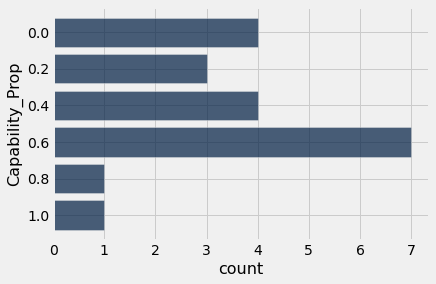

In [14]:
tiered_table.barh("Capability_Prop")

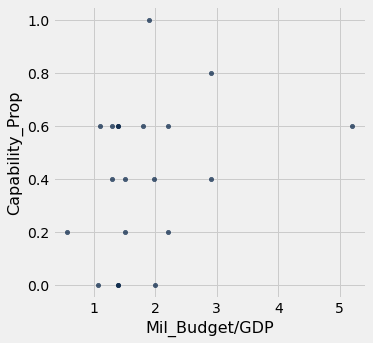

In [15]:
by_partner_region_v4.scatter("Mil_Budget/GDP", "Capability_Prop")

In [16]:
#Basic regression data

def standard_units(values):
    return ((values - np.mean(values))/np.std(values))

regression_data_table = Table().with_columns("CP_SU", standard_units(by_partner_region_v4.column("Capability_Prop")),
                                            
                                             "MB_SU", standard_units(by_partner_region_v4.column("Mil_Budget/GDP")))

                                             

r_table = regression_data_table.with_columns("Products", regression_data_table.column(0)*regression_data_table.column(1))

regression_coefficient = np.mean(r_table.column(2))
regression_coefficient

0.30161658668277014

## Some new data to clean and be joined with existing working tables

In [4]:
space_track = Table().read_table("space_track.csv")

space_track

OBJECT_ID,OBJECT_NAME,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,RCSVALUE,LAUNCH,COMMENT
1998-067TP,ISS DEB,52952,CIS,92.87,51.64,419,411,nan,0,1998-11-20,nan
2022-074H,OBJECT H,52951,US,94.52,44.99,498,493,nan,0,2022-07-02,nan
2022-074G,OBJECT G,52950,US,94.52,45,498,493,nan,0,2022-07-02,nan
2022-074F,OBJECT F,52949,US,94.52,44.99,499,492,nan,0,2022-07-02,nan
2022-074E,OBJECT E,52948,US,94.47,44.98,497,489,nan,0,2022-07-02,nan
2022-074D,SLIGHTSHOT1,52947,US,94.5,44.99,497,491,nan,0,2022-07-02,nan
2022-074C,OBJECT C,52946,US,93.84,44.99,495,430,nan,0,2022-07-02,nan
2022-074B,OBJECT B,52945,US,94.53,44.99,499,493,nan,0,2022-07-02,nan
2022-074A,RECURVE,52944,US,94.54,45,499,493,nan,0,2022-07-02,nan
2022-073D,ATLAS 5 CENTAUR DEB,52943,US,nan,nan,nan,nan,nan,0,2022-07-01,NO INITIAL ELEMENTS


In [18]:
#EDA and useful functions

int(np.array((space_track.row(0).item(10)).split("-")).item(0))

1998

In [5]:
years = make_array()

for i in np.arange(space_track.num_rows):
    yr = int(np.array((space_track.row(i).item(10)).split("-")).item(0))
    years = np.append(years, yr)
    
space_tracker = space_track.drop("LAUNCH").with_columns("LAUNCH", years)
space_tracker.show(10)

OBJECT_ID,OBJECT_NAME,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,RCSVALUE,COMMENT,LAUNCH
1998-067TP,ISS DEB,52952,CIS,92.87,51.64,419,411,nan,0,nan,1998
2022-074H,OBJECT H,52951,US,94.52,44.99,498,493,nan,0,nan,2022
2022-074G,OBJECT G,52950,US,94.52,45,498,493,nan,0,nan,2022
2022-074F,OBJECT F,52949,US,94.52,44.99,499,492,nan,0,nan,2022
2022-074E,OBJECT E,52948,US,94.47,44.98,497,489,nan,0,nan,2022
2022-074D,SLIGHTSHOT1,52947,US,94.5,44.99,497,491,nan,0,nan,2022
2022-074C,OBJECT C,52946,US,93.84,44.99,495,430,nan,0,nan,2022
2022-074B,OBJECT B,52945,US,94.53,44.99,499,493,nan,0,nan,2022
2022-074A,RECURVE,52944,US,94.54,45,499,493,nan,0,nan,2022
2022-073D,ATLAS 5 CENTAUR DEB,52943,US,nan,nan,nan,nan,nan,0,NO INITIAL ELEMENTS,2022


In [7]:
hist_table = space_tracker.select("OBJECT_NAME", "COUNTRY").group("COUNTRY")

In [8]:
hist_table.show(10)

COUNTRY,count
AB,14
AC,8
AGO,1
ALG,6
ARGN,49
ASRA,3
AUS,31
AZER,3
BEL,6
BELA,2


## Some new data to clean and be joined with existing working tables

In [10]:
box_score = Table().read_table("boxscore.csv")
box_score.show(5)

COUNTRY,SPADOC_CD,ORBITAL_TBA,ORBITAL_PAYLOAD_COUNT,ORBITAL_ROCKET_BODY_COUNT,ORBITAL_DEBRIS_COUNT,ORBITAL_TOTAL_COUNT,DECAYED_PAYLOAD_COUNT,DECAYED_ROCKET_BODY_COUNT,DECAYED_DEBRIS_COUNT,DECAYED_TOTAL_COUNT,COUNTRY_TOTAL
ARAB SATELLITE COMMUNICATIONS ORGANIZATION,AB,0,14,0,0,14,1,0,0,1,15
ASIASAT CORP,AC,0,8,0,0,8,0,0,0,0,8
REPUBLIC OF ANGOLA,AGO,0,1,0,0,1,0,0,0,0,1
ALGERIA,ALG,0,6,0,0,6,0,0,0,0,6
ARGENTINA,ARGN,0,48,0,1,49,2,0,0,2,51


In [23]:
partner_list_2 = make_array("AUSTRALIA", "BELGIUM", "CANADA", "DENMARK", "FRANCE", "GERMANY", "INDIA", "ISRAEL", "ITALY", "JAPAN", "LUXEMBOURG", "NETHERLANDS", "NORWAY", "NEW ZEALAND", "POLAND", "ROMANIA", "SOUTH KOREA", "SPAIN", "THAILAND", "UNITED KINGDOM")
cty_names_2 = make_array('Australia', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany',
       'India', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands',
       'Norway', 'New Zealand', 'Poland', 'Romania', 'Korea, South',
       'Spain', 'Thailand', 'United Kingdom')

box_scores = box_score.where("COUNTRY", are.contained_in(partner_list_2)).drop("COUNTRY").with_columns("CTYNAME", cty_names_2)
box_scores.show()
join_table = box_scores.select("CTYNAME", "ORBITAL_TOTAL_COUNT", "ORBITAL_PAYLOAD_COUNT", "ORBITAL_ROCKET_BODY_COUNT", "ORBITAL_DEBRIS_COUNT")

SPADOC_CD,ORBITAL_TBA,ORBITAL_PAYLOAD_COUNT,ORBITAL_ROCKET_BODY_COUNT,ORBITAL_DEBRIS_COUNT,ORBITAL_TOTAL_COUNT,DECAYED_PAYLOAD_COUNT,DECAYED_ROCKET_BODY_COUNT,DECAYED_DEBRIS_COUNT,DECAYED_TOTAL_COUNT,COUNTRY_TOTAL,CTYNAME
AUS,0,29,2,0,31,6,0,0,6,37,Australia
BEL,0,6,0,0,6,1,0,0,1,7,Belgium
CA,0,76,0,5,81,4,0,2,6,87,Canada
DEN,0,10,0,0,10,3,0,0,3,13,Denmark
FR,0,82,166,351,599,11,82,669,762,1361,France
GER,0,86,0,1,87,17,0,1,18,105,Germany
IND,0,108,40,73,221,13,25,449,487,708,India
ISRA,0,22,0,0,22,6,9,1,16,38,Israel
IT,0,40,2,0,42,13,0,2,15,57,Italy
JPN,3,205,62,47,317,73,69,276,418,735,Japan


## Some joins and EDA: building up to developing a metric for aggregating and weighting some of the observed space-faring attributes of partner nations.

In [24]:
data_table = by_partner_region_v4.join("CTYNAME", join_table)
data_table.show()

CTYNAME,IYR,EYR,Mil_Budget/GDP,SSA/SDA,ISR,PNT,SATCOM,Launch,Capability_Prop,ORBITAL_TOTAL_COUNT,ORBITAL_PAYLOAD_COUNT,ORBITAL_ROCKET_BODY_COUNT,ORBITAL_DEBRIS_COUNT
Australia,12466.5,26453.9,1.98,1,1,0,0,0,0.4,31,29,2,0
Belgium,20996.1,33721,1.07,0,0,0,0,0,0,6,6,0,0
Canada,357788,307758,1.39,0,1,1,1,0,0.6,81,76,0,5
Denmark,12108.4,3543.82,1.5,1,0,0,0,0,0.2,10,10,0,0
France,50103.8,29893.3,1.9,1,1,1,1,1,1,599,82,166,351
Germany,135216,65332.5,1.3,1,1,0,1,0,0.6,87,86,0,1
India,73172.6,40052.2,2.9,0,1,1,1,1,0.8,221,108,40,73
Israel,18645.9,12861.9,5.2,0,1,0,1,1,0.6,22,22,0,0
Italy,60950.8,21660.5,1.5,0,0,0,1,1,0.4,42,40,2,0
Japan,134860,74564.7,1.1,0,0,1,1,1,0.6,317,205,62,47


In [25]:
#Lets compare tiers 1-6 to their average orbital payload count:

artifact_1 = data_table.select("Capability_Prop", "ORBITAL_PAYLOAD_COUNT").group("Capability_Prop", np.mean)
artifact_1

Capability_Prop,ORBITAL_PAYLOAD_COUNT mean
0,9.5
0.2,11
0.4,28.75
0.6,132.429
0.8,108
1,82


In [26]:
artifact_v1 = artifact_1.drop("Capability_Prop").with_columns("Tier", make_array(6,5,4,3,2,1)).relabel("ORBITAL_PAYLOAD_COUNT mean", "Ave Orbital Payload Count")
artifact_v1

Ave Orbital Payload Count,Tier
9.5,6
11,5
28.75,4
132.429,3
108,2
82,1


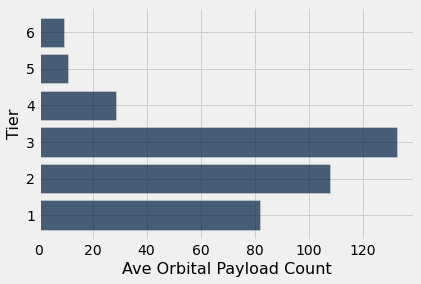

In [27]:
artifact_v1.barh("Tier")

In [28]:
percentile(48, np.arange(10))

4

# Building the Partnership Capacity Metric 

In [29]:
#A measure of partnership capacity: PC = c_1(v_1) + c_2(v_2) + c_3(v_3) + ... + c_n(v_n)

#Partnership Capacity is defined as a weighted linear combination of partner country tier standings (1-6)
#for different military/economic/space attributes 

#Method for developing equivalent mode-based tiers:

def tier_getter(tier, column):
    upper = percentile((tier/6)*100, data_table.column(column))
    lower = percentile(((tier-1)/6)*100, data_table.column(column))
    countries = data_table.where(column, are.above(lower)).where(column, are.below_or_equal_to(upper)).column("CTYNAME")
    return np.append(countries, f"tier {tier}")


def tier_finder_mb(country):
    for i in np.arange(1,7):
        array = tier_getter(i, "Mil_Budget/GDP")
        if country in array:
            return i
    else:
        return 1
            

        
def tier_finder_opc(country):
    for i in np.arange(1,7):
        array = tier_getter(i, "ORBITAL_PAYLOAD_COUNT")
        if country in array:
            return i
    else:
        return 1
    


#Tier finder for Capability Proportions. Seperate code because this tier system is not mode-based so percentiles are mute.

def tier_finder_cp(country):
    prop_array = make_array(0,0.2,0.4,0.6,0.8,1)
    tier_array = make_array(1,2,3,4,5,6)
    item = data_table.where("CTYNAME", are.equal_to(country)).column("Capability_Prop").item(0)
    index = (np.where(prop_array == item))[0].item(0)
    return tier_array.item(index)


In [30]:
#Generating Partnership Capacity Table

countries = data_table.column("CTYNAME")
p_capacity = make_array()
for i in countries:
    pc = partnership_capacity(i)
    p_capacity = np.append(p_capacity, pc)

Partnership_Capacity = Table().with_columns("Country", countries, "Partnership Capacity", p_capacity)
Partnership_Capacity.show()

Country,Partnership Capacity
Australia,3.5
Belgium,1
Canada,3.9
Denmark,1.9
France,5.3
Germany,3.7
India,5.5
Israel,4.1
Italy,3.3
Japan,4


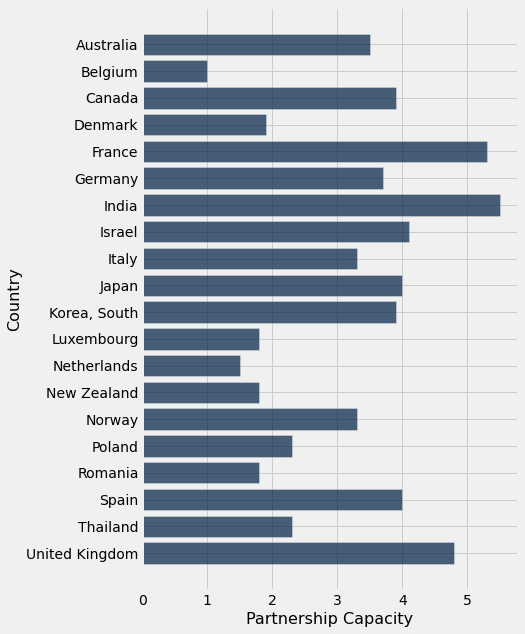

In [31]:
Partnership_Capacity.barh("Country")

# Adapting PC Metric to capture more pertinent space-faring attributes like Space Military Budget

In [35]:
#Attribute Formulation, Data Development, and Scripting for Teir Calculations

#2017 Space Budgets as a share of GDP... from OECD

sp_bud_values = make_array("AUS", 0.049, 0.016, 0.016, 0.105, 0.047, 0.062, 0.040, 0.049, 0.070, 
                           0.039, 0.069, 0.018, "NZL", 0.035, 0.014, 0.025, 0.019, "THLND", 0.021)

#Countries not listed either have space budget shares of their GDP less than (or around) 0.001% 
#or have not provided publicly accessible data.

### By design, if we assign a value of 0.001% to countires lacking data from OECD, they will 
### automatically recieve tier 1 status ###

sp_bud_values = make_array(0.001, 0.049, 0.016, 0.016, 0.105, 0.047, 0.062, 0.040, 0.049, 0.070, 
                           0.039, 0.069, 0.018, 0.001, 0.035, 0.014, 0.025, 0.019, 0.001, 0.021)

data_table = data_table.with_columns("Space_Budget/GDP", sp_bud_values)

def tier_finder_spb(country):
    for i in np.arange(1,7):
        array = tier_getter(i, "Space_Budget/GDP")
        if country in array:
            return i
    else:
        return 1
    
#Array of weights corresponding to attribute priority level in the current order: Mil_Bud/GDP , Cap_Prop , OPC, Sp_Bud/GDP (%)

array_of_weights_1 = make_array(0.2,0.5,0.3)

array_of_weights_2 = make_array(0.15, 0.25, 0.3, 0.3)

def partnership_capacity(country):
    tier_array = make_array(tier_finder_mb(country), tier_finder_cp(country), tier_finder_opc(country), tier_finder_spb(country))
    return sum(tier_array*array_of_weights_2)

In [36]:
data_table.show()

CTYNAME,IYR,EYR,Mil_Budget/GDP,SSA/SDA,ISR,PNT,SATCOM,Launch,Capability_Prop,ORBITAL_TOTAL_COUNT,ORBITAL_PAYLOAD_COUNT,ORBITAL_ROCKET_BODY_COUNT,ORBITAL_DEBRIS_COUNT,Space_Budget/GDP
Australia,12466.5,26453.9,1.98,1,1,0,0,0,0.4,31,29,2,0,0.001
Belgium,20996.1,33721,1.07,0,0,0,0,0,0,6,6,0,0,0.049
Canada,357788,307758,1.39,0,1,1,1,0,0.6,81,76,0,5,0.016
Denmark,12108.4,3543.82,1.5,1,0,0,0,0,0.2,10,10,0,0,0.016
France,50103.8,29893.3,1.9,1,1,1,1,1,1,599,82,166,351,0.105
Germany,135216,65332.5,1.3,1,1,0,1,0,0.6,87,86,0,1,0.047
India,73172.6,40052.2,2.9,0,1,1,1,1,0.8,221,108,40,73,0.062
Israel,18645.9,12861.9,5.2,0,1,0,1,1,0.6,22,22,0,0,0.04
Italy,60950.8,21660.5,1.5,0,0,0,1,1,0.4,42,40,2,0,0.049
Japan,134860,74564.7,1.1,0,0,1,1,1,0.6,317,205,62,47,0.07


In [37]:
#Generating Partnership Capacity Table V.2

countries = data_table.column("CTYNAME")
p_capacity = make_array()
for i in countries:
    pc = partnership_capacity(i)
    p_capacity = np.append(p_capacity, pc)

Partnership_Capacity_2 = Table().with_columns("Country", countries, "Partnership Capacity", p_capacity)
Partnership_Capacity_2.show()

Country,Partnership Capacity
Australia,2.85
Belgium,2.2
Canada,3.4
Denmark,1.85
France,5.4
Germany,3.85
India,5.45
Israel,4
Italy,3.9
Japan,4.75


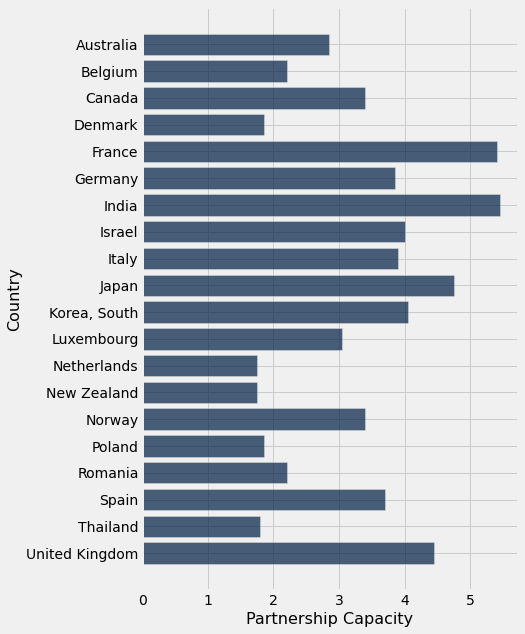

In [38]:
Partnership_Capacity_2.barh("Country")